#### Import the libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [33]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [34]:
df.shape
# rows = 2073, cols = 81

(200, 4)

In [35]:
df1 = df.copy()

#### Creating a function to generate a dataframe containing features, count of null values and percentage of null values for features having count of null values>0. Return df in desc of per of null values

In [36]:
def count_per_null(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Features':nv.index,'Count_Null':nv.values,
                         'Per_Null': (nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null',ascending=False)
    return nv_df

In [37]:
nv_df = count_per_null(df)
nv_df

,Features,Count_Null,Per_Null


In [38]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [39]:
df.dtypes.value_counts()

float64    4
dtype: int64

In [40]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index([], dtype='object')
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [41]:
nv_df

,Features,Count_Null,Per_Null


In [42]:
count_per_null(df)

,Features,Count_Null,Per_Null


#### 2) Handle Duplicates

In [43]:
df.duplicated().sum()

0

In [44]:
df.shape

(200, 4)

In [45]:
print(df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


### EDA (Exploratory Data Analysis)

In [46]:
print(cat_cols)

Index([], dtype='object')


In [47]:
def feat_desc(data,feat,target=None):
    dtype = str(data[feat].dtypes)
    print('Type: ', dtype)
    if dtype=='object':
        print('Mode: ',data[feat].mode()[0])
        x1 = data[feat].value_counts()
        feat_df = x1.reset_index()  
        feat_df.columns = ['Catgories','Count']  
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.countplot(x=data[feat])  
        plt.title(f'Countplot for {feat}')
        if target!=None:
            plt.subplot(1,2,2)
            sns.boxplot(x=data[feat],y = data[target])  
            plt.title(f'Boxplot for {feat} wrt {target}')
        plt.show()
        return feat_df
    elif dtype.startswith('i') or dtype.startswith('f'):
        print('Statistical Summary :\n',data[feat].describe())
        plt.figure(figsize=(14,4))
        plt.subplot(1,3,1)
        sns.kdeplot(x=data[feat])  
        plt.title(f'Displot for {feat}')
        plt.subplot(1,3,2)
        sns.boxplot(x=data[feat])  
        plt.title(f'Boxplot for {feat}')
        if target!=None:
            plt.subplot(1,3,3)
            sns.scatterplot(x=data[feat],y = data[target])  
            plt.title(f'Scatterplot for {feat} wrt {target}')
        plt.show()

Type:  float64
Statistical Summary :
 count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64


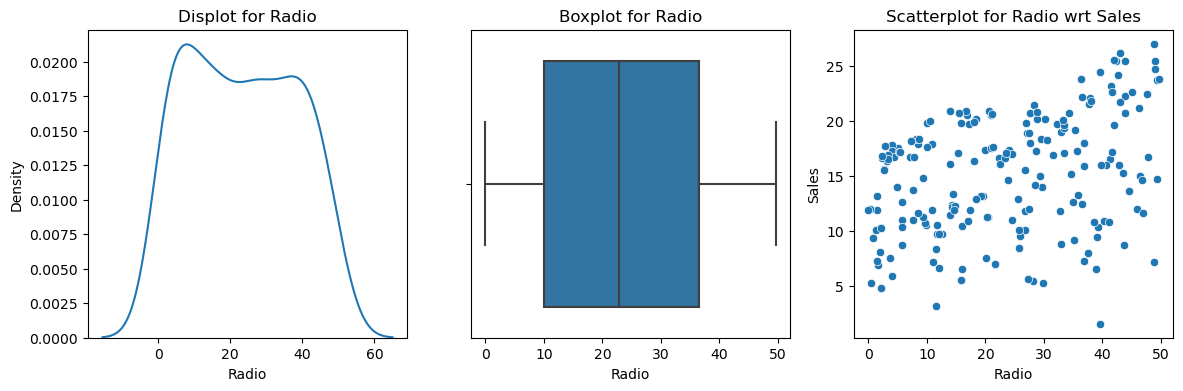

In [48]:
a1 = feat_desc(df,'Radio', 'Sales')
a1

Type:  float64
Statistical Summary :
 count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64


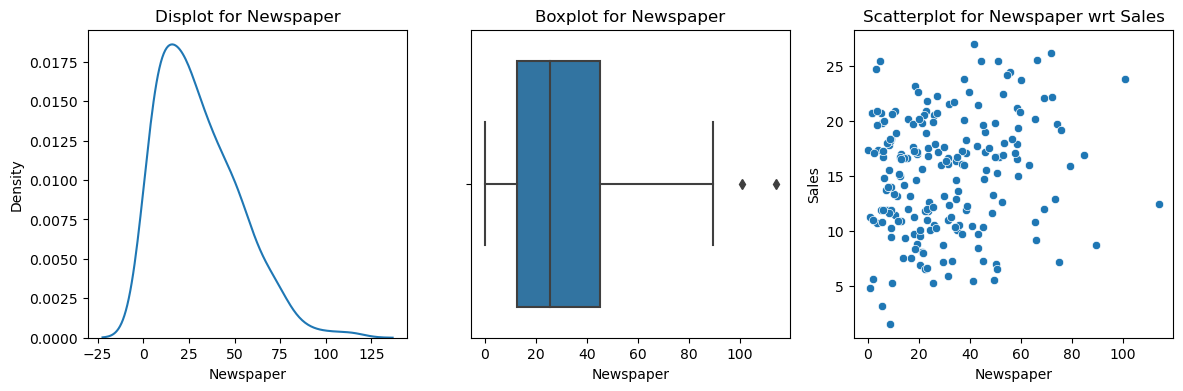

In [49]:
a2 = feat_desc(df,'Newspaper', 'Sales')
a2

Type:  float64
Statistical Summary :
 count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64


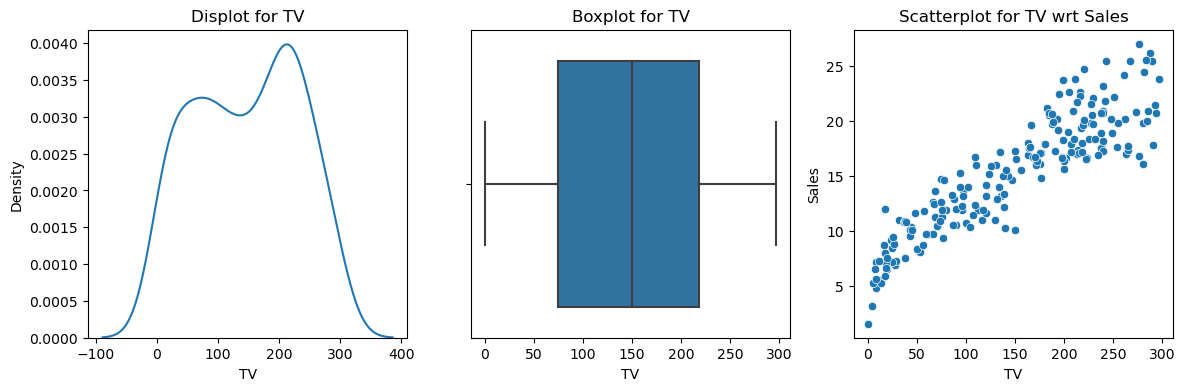

In [50]:
a3 = feat_desc(df,'TV', 'Sales')
a3

### Correlation

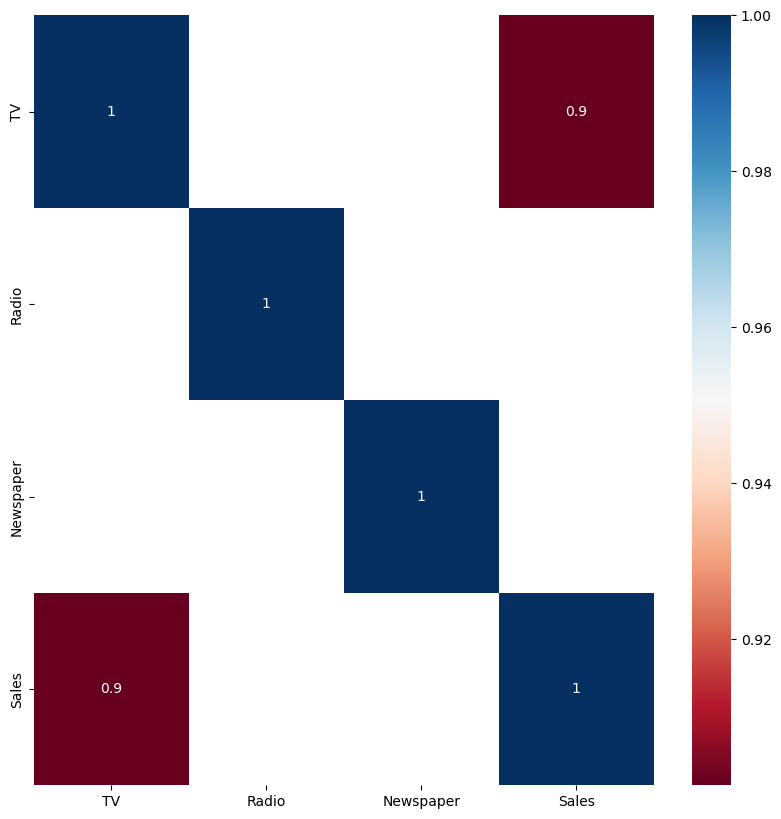

In [55]:
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr[abs(corr)>=0.4],annot=True,cmap='RdBu')
plt.show()

#### Outlier treatment

In [56]:
s1  = df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
s1 = s1.iloc[:,3:]
s1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
TV,0.7,5.387,7.790,8.594,13.195,149.75,280.735,286.048,289.720,292.907,296.4
Radio,0.0,0.399,1.290,1.497,1.995,22.90,46.810,48.900,49.000,49.400,49.6
Newspaper,0.3,0.999,1.798,2.197,3.600,25.75,71.825,75.018,79.312,89.515,114.0
Sales,1.6,4.784,5.300,5.597,6.600,16.00,23.800,24.721,25.400,25.507,27.0


In [57]:
lower_end_feat = ['TV', 'Radio', 'Newspaper', 'Sales']
upper_end_feat = ['TV', 'Radio', 'Newspaper', 'Sales']

In [58]:
def ol_treatment_upper_end(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

def ol_treatment_lower_end(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [59]:
df[lower_end_feat] = df[lower_end_feat].apply(ol_treatment_lower_end)
df[upper_end_feat] = df[upper_end_feat].apply(ol_treatment_upper_end)

In [60]:
s2  = df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
s2 = s2.iloc[:,3:]
s2

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
TV,5.387,5.39987,7.790,8.594,13.195,149.75,280.735,286.048,289.720,292.90007,292.907
Radio,0.399,0.39999,1.290,1.497,1.995,22.90,46.810,48.900,49.000,49.40000,49.400
Newspaper,0.999,0.99999,1.798,2.197,3.600,25.75,71.825,75.018,79.312,89.40115,89.515
Sales,4.784,4.79984,5.300,5.597,6.600,16.00,23.800,24.721,25.400,25.50007,25.507


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [62]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3836\3580352777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


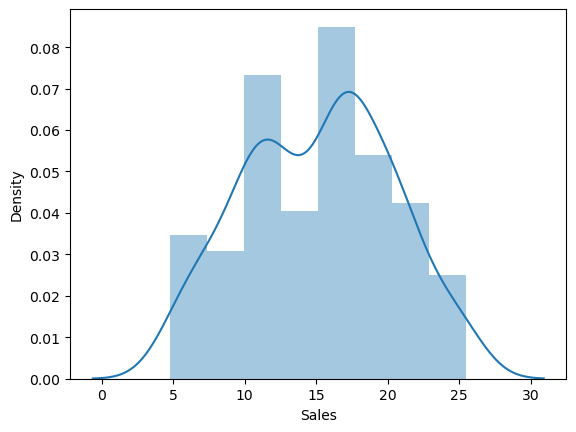

In [63]:
sns.distplot(df['Sales'])
plt.show()

In [64]:
from scipy.stats import shapiro

In [65]:
print(shapiro(df['Sales']))
print(shapiro(np.log(df['Sales'])))

ShapiroResult(statistic=0.9793816208839417, pvalue=0.0048649911768734455)
ShapiroResult(statistic=0.940662682056427, pvalue=2.6186128820882004e-07)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3836\1181227728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Sales']))


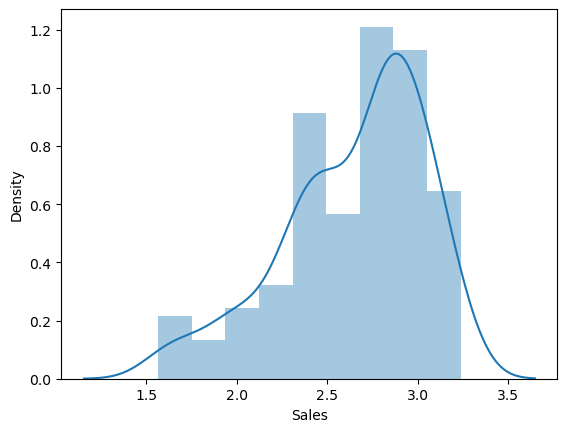

In [67]:
sns.distplot(np.log(df['Sales']))
plt.show()

#### Select x and y

In [84]:
x = df.drop('Sales',axis=1)
y = np.log(df['Sales'])
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [87]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [88]:
print('Train Score', lr.score(x_train,y_train))
print('Test Score', lr.score(x_test,y_test))

Train Score 0.8591639342831636
Test Score 0.846804582970298


#### Inference
Model  is underfit

In [75]:
x1 = df.drop('Sales',axis=1)
y1 = (df['Sales'])
print(x1.shape)
print(y1.shape)

(200, 3)
(200,)


In [76]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [80]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [81]:
print('Train Score', lr1.score(x_train,y_train))
print('Test Score', lr1.score(x_test,y_test))

Train Score 0.9087543624608095
Test Score 0.9052018564263025
